In [375]:
import configparser
import pandas as pd
from sqlalchemy import create_engine  # an ORM to access db and manipulate it in a pythonic way
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [376]:
config = configparser.ConfigParser()
config.read('login.cfg')
host = config.get('DataBase', 'host')
dbname = config.get('DataBase','dbname')
user = config.get('DataBase', 'user')
password = config.get('DataBase','password')
port = config.get('DataBase','port')


#!PGPASSWORD=student createdb -h 127.0.0.1 -U postgres pagila    (orders in psql shell to create a db)

#!PGPASSWORD=student psql -q -h 127.0.0.1 -U student -d pagila -f Data/pagila-schema.sql

#!PGPASSWORD=student psql -q -h 127.0.0.1 -U student -d pagila -f Data/pagila-data.sql

In [377]:
alchemyEngine = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, password,host,port,dbname),pool_recycle=3600)
# Connect to PostgreSQL server using connection string
dbConnection = alchemyEngine.connect()
df = pd.read_sql_table(table_name = "shopping",con=dbConnection)

### pandas analysis section

In [378]:
df.head()

customer_id  age gender item_purchased  category  purchase_amount_usd  \
0            1   55   Male         Blouse  Clothing                 53.0   
1            2   19   Male        Sweater  Clothing                 64.0   
2            3   50   Male          Jeans  Clothing                 73.0   
3            4   21   Male        Sandals  Footwear                 90.0   
4            5   45   Male         Blouse  Clothing                 49.0   

       location_ size_      color  season  review_rating subscription_status  \
0       Kentucky     L       Gray  Winter            3.1                 Yes   
1          Maine     L     Maroon  Winter            3.1                 Yes   
2  Massachusetts     S     Maroon  Spring            3.1                 Yes   
3   Rhode Island     M     Maroon  Spring            3.5                 Yes   
4         Oregon     M  Turquoise  Spring            2.7                 Yes   

   shipping_type discount_applied promo_code_used  previous_purchases  \
0        Express              Yes             Yes                14.0   
1        Express              Yes             Yes                 2.0   
2  Free Shipping              Yes             Yes                23.0   
3   Next Day Air              Yes             Yes                49.0   
4  Free Shipping              Yes             Yes                31.0   

  payment_method frequency_of_purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [379]:
df.describe()

customer_id          age  purchase_amount_usd  review_rating  \
count  3900.000000  3900.000000          3900.000000    3900.000000   
mean   1950.500000    44.068462            59.764359       3.749949   
std    1125.977353    15.207589            23.685392       0.716223   
min       1.000000    18.000000            20.000000       2.500000   
25%     975.750000    31.000000            39.000000       3.100000   
50%    1950.500000    44.000000            60.000000       3.700000   
75%    2925.250000    57.000000            81.000000       4.400000   
max    3900.000000    70.000000           100.000000       5.000000   

       previous_purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [197]:
df.nunique()

customer_id               3900
age                         53
gender                       2
item_purchased              25
category                     4
purchase_amount_usd         81
location_                   50
size_                        4
color                       25
season                       4
review_rating               26
subscription_status          2
shipping_type                6
discount_applied             2
promo_code_used              2
previous_purchases          50
payment_method               6
frequency_of_purchases       7
dtype: int64

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3900 non-null   int64  
 1   age                     3900 non-null   int64  
 2   gender                  3900 non-null   object 
 3   item_purchased          3900 non-null   object 
 4   category                3900 non-null   object 
 5   purchase_amount_usd     3900 non-null   float64
 6   location_               3900 non-null   object 
 7   size_                   3900 non-null   object 
 8   color                   3900 non-null   object 
 9   season                  3900 non-null   object 
 10  review_rating           3900 non-null   float64
 11  subscription_status     3900 non-null   object 
 12  shipping_type           3900 non-null   object 
 13  discount_applied        3900 non-null   object 
 14  promo_code_used         3900 non-null   

In [187]:
print(df.shape)
df.describe()

(3900, 18)


customer_id          age  purchase_amount_usd  review_rating  \
count  3900.000000  3900.000000          3900.000000    3900.000000   
mean   1950.500000    44.068462            59.764359       3.749949   
std    1125.977353    15.207589            23.685392       0.716223   
min       1.000000    18.000000            20.000000       2.500000   
25%     975.750000    31.000000            39.000000       3.100000   
50%    1950.500000    44.000000            60.000000       3.700000   
75%    2925.250000    57.000000            81.000000       4.400000   
max    3900.000000    70.000000           100.000000       5.000000   

       previous_purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

getting locations of max,min and medium purchases

In [342]:
df2 = df.astype({'purchase_amount_usd': 'int8'})

In [319]:
df2['purchase_amount_usd'].describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: purchase_amount_usd, dtype: float64

In [320]:
amount_number = [20.000000,39.000000,60.000000,81.000000,100.000000]
amount = ["low_price","medium_price","high_price","expensive_price"]
df2["prices_range"] = pd.cut(df2['purchase_amount_usd'],amount_number,labels = amount)

In [191]:
df2.groupby("prices_range")["gender"].value_counts()

prices_range     gender
low_price        Male      674
                 Female    288
medium_price     Male      644
                 Female    328
high_price       Male      674
                 Female    314
expensive_price  Male      625
                 Female    301
Name: count, dtype: int64

In [192]:
df2.query('purchase_amount_usd == 100').head(3)

customer_id  age gender item_purchased     category  purchase_amount_usd  \
42            43   20   Male           Coat    Outerwear                  100   
95            96   37   Male       Sneakers     Footwear                  100   
193          194   36   Male           Belt  Accessories                  100   

        location_ size_   color  season  review_rating subscription_status  \
42      Tennessee     M   Beige  Spring            4.1                 Yes   
95       Missouri     L    Pink    Fall            3.8                 Yes   
193  North Dakota     S  Silver    Fall            3.0                 Yes   

     shipping_type discount_applied promo_code_used  previous_purchases  \
42   Free Shipping              Yes             Yes                15.0   
95   Free Shipping              Yes             Yes                48.0   
193       Standard              Yes             Yes                29.0   

    payment_method frequency_of_purchases     prices_range  
42          PayPal               Annually  expensive_price  
95          PayPal                Monthly  expensive_price  
193          Venmo               Annually  expensive_price

In [193]:
df2.groupby('prices_range')['location_'].agg(lambda x:x.value_counts().index[0])

prices_range
low_price              Maryland
medium_price         California
high_price         Pennsylvania
expensive_price        Virginia
Name: location_, dtype: object

Most bought clothing for men is pants and for women is blouse

Text(0, 0.5, 'number of purchases')

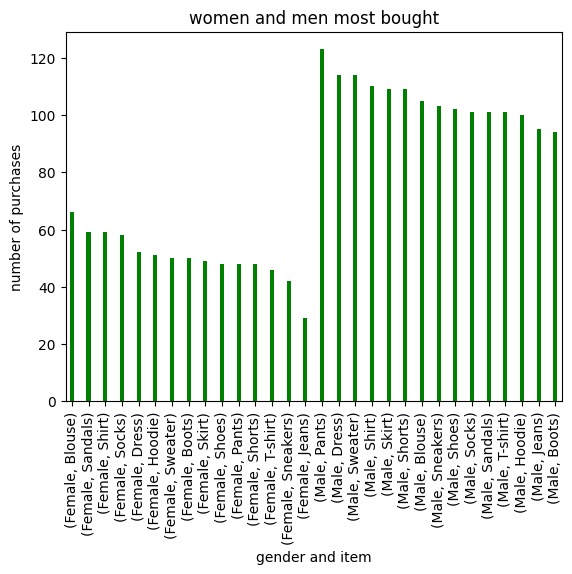

In [194]:
df2.query("category == 'Clothing' or category == 'Footwear'").groupby('gender')['item_purchased'].value_counts().plot(kind = 'bar',width = .25,color = 'green')
plt.title('women and men most bought')
plt.xlabel('gender and item',fontsize = 10)
plt.ylabel('number of purchases',fontsize = 10)

getting age of men of maximum purchases

In [195]:
repetition = 0
age = 0
for i in df2.query('gender == "Male"').groupby('age')['gender'].value_counts():
    if  i > repetition :
        repetition = df2.query('gender == "Male"').groupby('age')['gender'].value_counts().index[i][0]
        age = i
print("number of males is {} ,".format(repetition),"age of max repetition is {}".format(age) )       

number of males is 67 , age of max repetition is 49


getting age of women of max purchases

In [196]:
repetition = 0
age = 0
for i in df2.query('gender == "Female"').groupby('age')['gender'].value_counts():
    if  i > repetition :
        repetition = df2.query('gender == "Female"').groupby('age')['gender'].value_counts().index[i][0]
        age = i
print("number of females is {} ,".format(repetition),"age of max repetition is {}".format(age) )   

number of females is 38 , age of max repetition is 20


### A/B testing section

### It seems that men's clothing are more bought than women's clothes . We need to check if it is true and increasing men's clothing is good for the business or not as the dataframe has samples for men more than women 

In [200]:
df.groupby('category')["gender"].value_counts()

category     gender
Accessories  Male       848
             Female     392
Clothing     Male      1181
             Female     556
Footwear     Male       400
             Female     199
Outerwear    Male       223
             Female     101
Name: count, dtype: int64

 We assume that men's bought clothing is more than women's so

 null Hypothesis is : P(men's clothing) =< P(women's clothing)

 then  P(men's clothing) - P(women's clothing) =< 0
 
 alternative Hypothesis is : P(men's clothing) > P(women's clothing) and alpha(error rate)=.05

In [347]:
#we get probability of men buying clothing
Pmc = df.query('gender == "Male" and category == "Clothing"').shape[0]/df.query('gender == "Male"').shape[0]
Pmc

0.4453242835595777

In [348]:
#we get probability of women buying clothing
Pwc = df.query('gender == "Female" and category == "Clothing"').shape[0]/df.query('gender == "Female"').shape[0]
Pwc

0.44551282051282054

In [349]:
population_diff = Pmc - Pwc
population_diff

-0.00018853695324283493

In [350]:
#calculate number of men and women 
numm = df.query('gender == "Male"')['gender'].count()
numw = df.query('gender == "Female"').shape[0]
print(numm , numw)

2652 1248


In [351]:
#making a sample of men who bought clothes
Phmen = df.query('gender == "Male"')
sample_men = Phmen.sample(numm,replace = True)
sample_men_clothing = sample_men[df['category'] == 'Clothing'].shape[0]/sample_men.shape[0]

C:\Users\OS\AppData\Local\Temp\ipykernel_1388\1293251531.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_men_clothing = sample_men[df['category'] == 'Clothing'].shape[0]/sample_men.shape[0]


In [352]:
#making a sample of women who bought clothes
Phwomen = df.query('gender == "Female"')
sample_women = Phwomen.sample(numw,replace = True)
sample_women_clothing = sample_women[df['category'] == 'Clothing'].shape[0]/sample_women.shape[0]

C:\Users\OS\AppData\Local\Temp\ipykernel_1388\1397126939.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_women_clothing = sample_women[df['category'] == 'Clothing'].shape[0]/sample_women.shape[0]


In [353]:
# bootstrapping multiple samples
diff = []
for i in range(10000):
    Phmen = df.query('gender == "Male"')
    sample_men = Phmen.sample(numm,replace = True)
    sample_men_clothing = sample_men[df['category'] == 'Clothing'].shape[0]/sample_men.shape[0]

    Phwomen = df.query('gender == "Female"')
    sample_women = Phwomen.sample(numw,replace = True)
    sample_women_clothing = sample_women[df['category'] == 'Clothing'].shape[0]/sample_women.shape[0]

    diff.append(sample_men_clothing-sample_women_clothing)

C:\Users\OS\AppData\Local\Temp\ipykernel_1388\4103554741.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_men_clothing = sample_men[df['category'] == 'Clothing'].shape[0]/sample_men.shape[0]
C:\Users\OS\AppData\Local\Temp\ipykernel_1388\4103554741.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_women_clothing = sample_women[df['category'] == 'Clothing'].shape[0]/sample_women.shape[0]
C:\Users\OS\AppData\Local\Temp\ipykernel_1388\4103554741.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_men_clothing = sample_men[df['category'] == 'Clothing'].shape[0]/sample_men.shape[0]
C:\Users\OS\AppData\Local\Temp\ipykernel_1388\4103554741.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_women_clothing = sample_women[df['category'] == 'Clothing'].shape[0]/sample_women.shape[0]
C:\Users\OS\AppData\Local\Temp\ipykernel_1388\41035547

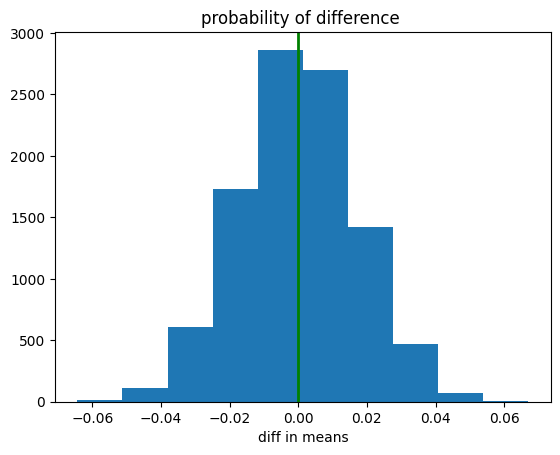

In [354]:
plt.hist(diff);
plt.axvline(population_diff,color ='g',linewidth = 2);
plt.xlabel("diff in means");
plt.title('probability of difference ');

the null hypothesis says the difference is less than or equal to 0


In [359]:
diff = np.array(diff)
(diff < 0 ).mean()

0.5024

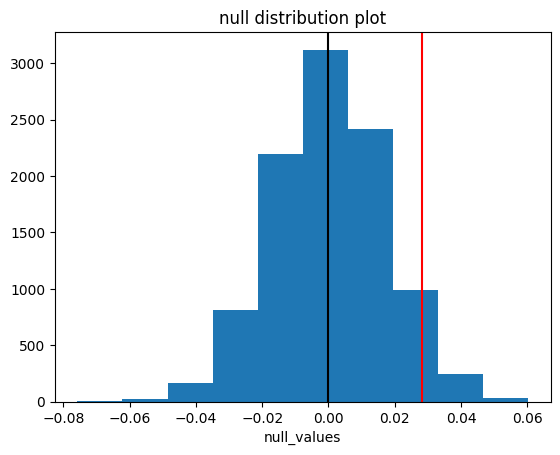

In [366]:
# alternatively, we can simulate the differences under the null, i.e. when the mean difference is 0
# we would observe our observed difference or a more extreme values in favour of H1, 
# given that the H0 is true
null_vals = np.random.normal(0, diff.std(), diff.size)
plt.hist(null_vals);
plt.xlabel("null_values");
plt.title('null distribution plot');
plt.axvline(x=population_diff, color='black');
plt.axvline(x=np.percentile(null_vals, 95), color='red');

In [367]:
p_value = (null_vals > diff.mean()).mean()
p_value

0.5036

so p-value is 50.36 which is more than alpha 50 

so we can't reject null Hypnothesis and hence increase in men's clothing is needed

### Regression  Model

In [321]:
df2.head()

customer_id  age gender item_purchased  category  purchase_amount_usd  \
0            1   55   Male         Blouse  Clothing                   53   
1            2   19   Male        Sweater  Clothing                   64   
2            3   50   Male          Jeans  Clothing                   73   
3            4   21   Male        Sandals  Footwear                   90   
4            5   45   Male         Blouse  Clothing                   49   

       location_ size_      color  season  review_rating subscription_status  \
0       Kentucky     L       Gray  Winter            3.1                 Yes   
1          Maine     L     Maroon  Winter            3.1                 Yes   
2  Massachusetts     S     Maroon  Spring            3.1                 Yes   
3   Rhode Island     M     Maroon  Spring            3.5                 Yes   
4         Oregon     M  Turquoise  Spring            2.7                 Yes   

   shipping_type discount_applied promo_code_used  previous_purchases  \
0        Express              Yes             Yes                14.0   
1        Express              Yes             Yes                 2.0   
2  Free Shipping              Yes             Yes                23.0   
3   Next Day Air              Yes             Yes                49.0   
4  Free Shipping              Yes             Yes                31.0   

  payment_method frequency_of_purchases     prices_range  
0          Venmo            Fortnightly     medium_price  
1           Cash            Fortnightly       high_price  
2    Credit Card                 Weekly       high_price  
3         PayPal                 Weekly  expensive_price  
4         PayPal               Annually     medium_price

In [333]:
# getting dummy variables of clothing 
df_category = pd.get_dummies(df2['category'])
df_category.drop(columns=['Accessories','Footwear','Outerwear'],inplace=True)
df_category.replace(True, 1, inplace=True)
df_category.replace(False, 0, inplace=True)
df_category.head()

Clothing
0         1
1         1
2         1
3         0
4         1

In [334]:
# getting dummy variables of gender 
df_gender = pd.get_dummies(df2['gender'])
df_gender .replace(True, 1, inplace=True)
df_gender .replace(False, 0, inplace=True)
df_gender .head()

Female  Male
0       0     1
1       0     1
2       0     1
3       0     1
4       0     1

In [343]:
df_new = df_gender.join(df_category)
df3 = df2.join(df_new)
df3.head(3)


customer_id  age gender item_purchased  category  purchase_amount_usd  \
0            1   55   Male         Blouse  Clothing                   53   
1            2   19   Male        Sweater  Clothing                   64   
2            3   50   Male          Jeans  Clothing                   73   

       location_ size_   color  season  ...  subscription_status  \
0       Kentucky     L    Gray  Winter  ...                  Yes   
1          Maine     L  Maroon  Winter  ...                  Yes   
2  Massachusetts     S  Maroon  Spring  ...                  Yes   

   shipping_type discount_applied promo_code_used previous_purchases  \
0        Express              Yes             Yes               14.0   
1        Express              Yes             Yes                2.0   
2  Free Shipping              Yes             Yes               23.0   

   payment_method frequency_of_purchases Female  Male  Clothing  
0           Venmo            Fortnightly      0     1         1  
1            Cash            Fortnightly      0     1         1  
2     Credit Card                 Weekly      0     1         1  

[3 rows x 21 columns]

In [368]:
df3['intercept'] = 1
log_mod = sm.GLM(df3['Clothing'], df3[['intercept', 'Male']])
results = log_mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Clothing   No. Observations:                 3900
Model:                            GLM   Df Residuals:                     3898
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                         0.24714
Method:                          IRLS   Log-Likelihood:                -2807.2
Date:                Fri, 27 Oct 2023   Deviance:                       963.37
Time:                        23:24:53   Pearson chi2:                     963.
No. Iterations:                     3   Pseudo R-squ. (CS):          1.628e-07
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4455      0.014     31.659      0.000       0.418       0.473
Male          -0.0002      0.017     -0.011      0.991      -0.034       0.033
==============================================================================
"""

P-value is 99.1 which is larger than our error rate alpha of 50 so we can't 
reject null hypothesis which means that the results of A/B testing align with the logistic regression results 
so no need in increasing male's clothing ratio than female's ratio